In [705]:
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
import pandas as pd

# Генерация датасетов

In [706]:
df1, df1_y = make_blobs(n_samples=300, n_features=5, centers = 3, cluster_std=1.2)

In [707]:
df2, df2_y = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=42)

In [708]:
df3, df3_y = make_blobs(n_samples=300, n_features=5, centers = 3, cluster_std=1.2)

# Визуализация

In [709]:
cls = lambda df, df_y: plt.scatter(df[:, 0], df[:, 1], marker="o", c=df_y)

## Первый датасет

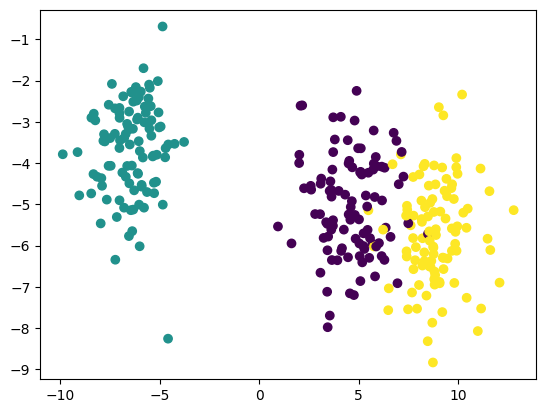

In [710]:
cls(df1, df1_y)

## Второй датасет

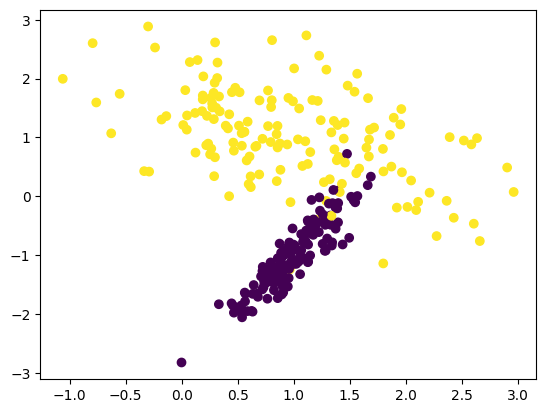

In [711]:
cls(df2, df2_y)

## Третий датасет

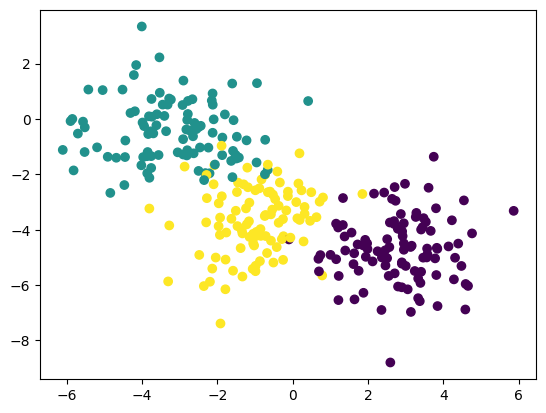

In [712]:
cls(df3, df3_y)

# Построение моделей кластеризация для созданных датасетов

In [713]:
def elbow(df):
    inertias = []
    for i in range(2, 10):
      m = KMeans(i, n_init='auto').fit(df)
      inertias.append(m.inertia_)
        
    plt.plot(range(2,10), inertias)

In [714]:
from sklearn.metrics import silhouette_score

In [715]:
def silho(df):
    ss = []    
    for i in range(2, 10):
      ss.append(silhouette_score(df, KMeans(i, n_init='auto').fit(df).labels_))  
    plt.plot(range(2,10), ss)

In [716]:
from sklearn.metrics import davies_bouldin_score

In [717]:
def dbi(df):
    scores = []
    for i in range(2, 10):
        kmeans = KMeans(i, n_init='auto').fit(df) 
        scores.append([davies_bouldin_score(df, kmeans.labels_), i])
    best = min(scores, key=lambda x: x[0])
    print(f'num clusters: {best[1]}, score: {best[0]}')

In [718]:
from sklearn.cluster import KMeans

## K-means

### Датасет 1

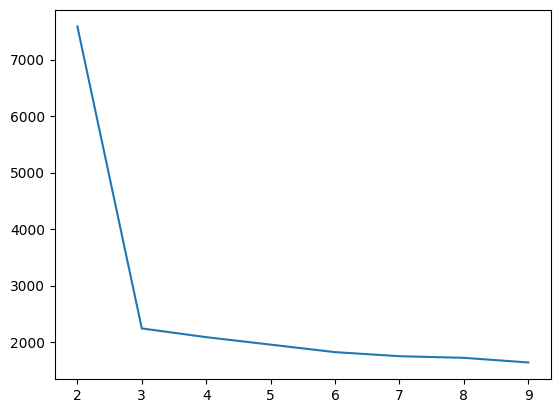

In [719]:
elbow(df1)

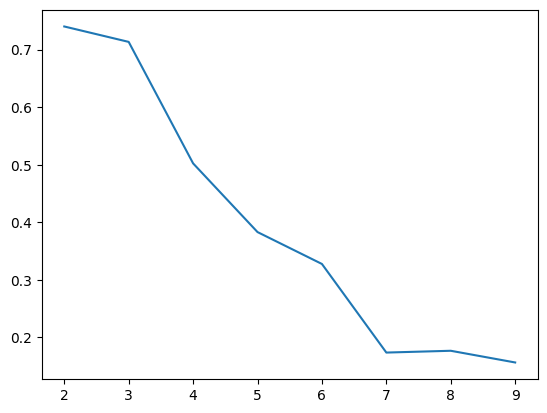

In [720]:
silho(df1)

In [721]:
dbi(df1)

num clusters: 2, score: 0.3604494194102488


In [722]:
from sklearn.metrics import rand_score, jaccard_score

In [723]:
kmeans = KMeans(n_clusters = 3, n_init='auto', max_iter = 20000).fit(df1) 

print(f'rand_score : {rand_score(df1_y, kmeans.labels_)}')
print(f'jaccard_score : {jaccard_score(df1_y, kmeans.labels_, average="micro")}')

rand_score : 1.0
jaccard_score : 0.2


In [1107]:
show = lambda df, df_y, model, axs: [
    axs[0].scatter(df[:,0], df[:,1], c=model.labels_, marker="o"),
    axs[0].scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c='red'),
    axs[1].scatter(df[:, 0], df[:, 1], marker="o", c=df_y)
]

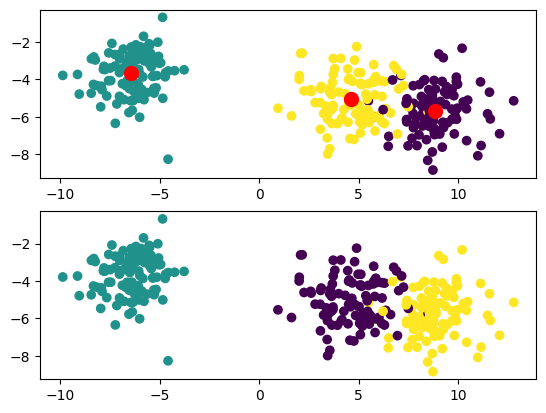

In [725]:
fig, axs = plt.subplots(2)
show(df1, df1_y, kmeans, axs)

### Датасет 2

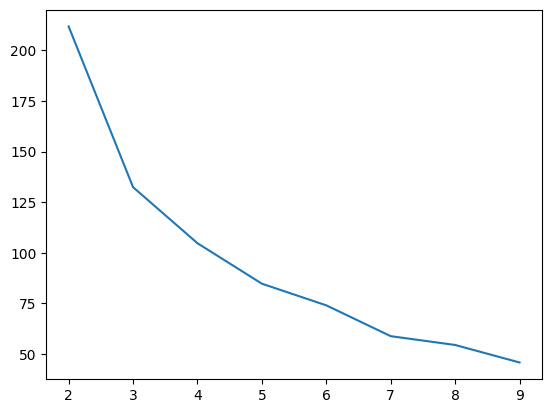

In [726]:
elbow(df2)

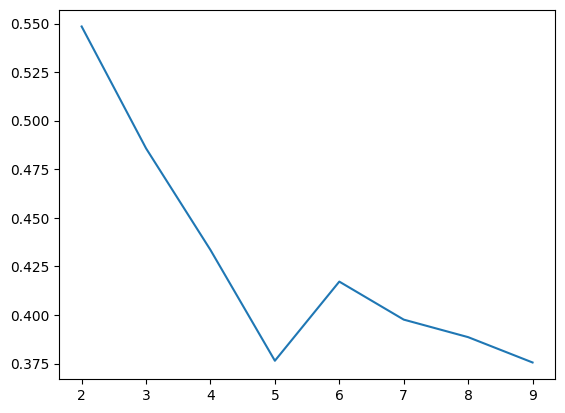

In [727]:
silho(df2)

In [728]:
dbi(df2)

num clusters: 2, score: 0.6708840778595158


In [729]:
kmeans = KMeans(n_clusters = 2, n_init='auto', max_iter = 20000).fit(df2) 

print(f'rand_score : {rand_score(df2_y, kmeans.labels_)}')
print(f'jaccard_score : {jaccard_score(df2_y, kmeans.labels_, average="micro")}')

rand_score : 0.8693645484949832
jaccard_score : 0.8691588785046729


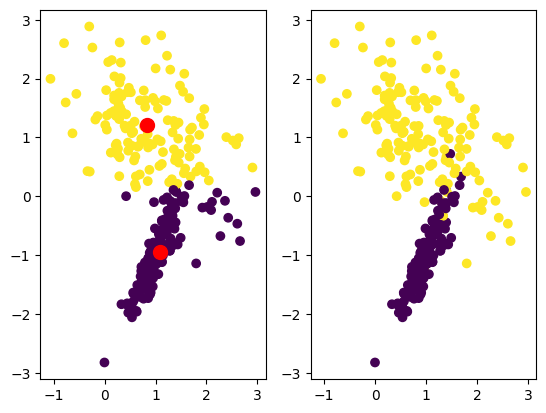

In [730]:
fig, axs = plt.subplots(1,2)
show(df2, df2_y, kmeans, axs)

### Датасет 3

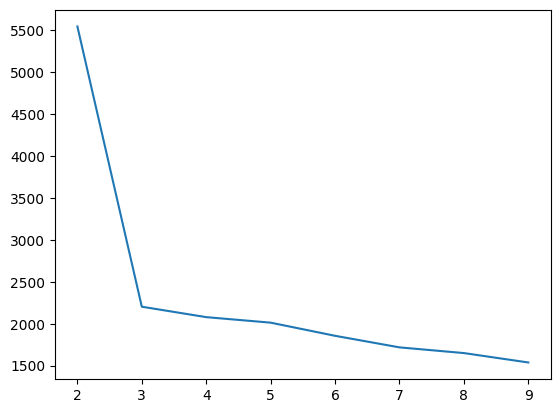

In [731]:
elbow(df3)

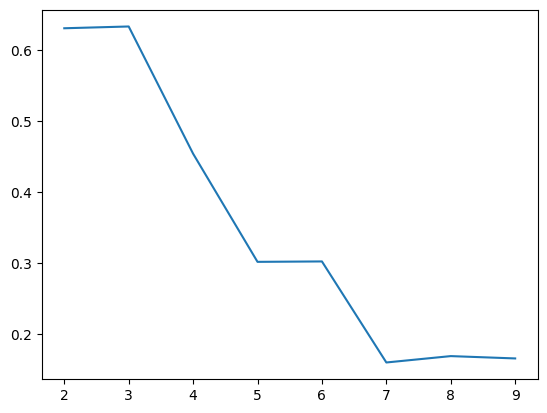

In [732]:
silho(df3)

In [733]:
dbi(df3)

num clusters: 2, score: 0.5324996766098138


In [1049]:
kmeans = KMeans(n_clusters = 3, n_init='auto', max_iter = 20000).fit(df3) 

print(f'rand_score : {rand_score(df3_y, kmeans.labels_)}')
print(f'jaccard_score : {jaccard_score(df3_y, kmeans.labels_, average="micro")}')

rand_score : 1.0
jaccard_score : 0.2


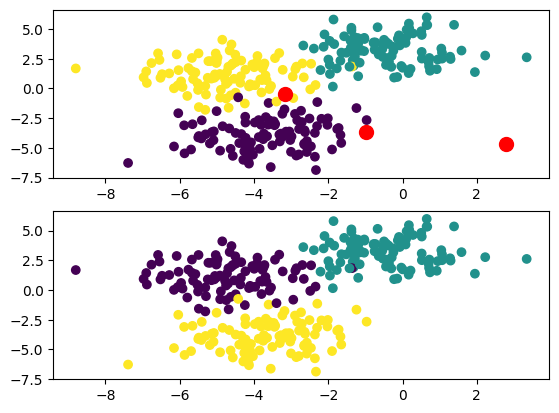

In [1050]:
fig, axs = plt.subplots(2)
show(df3, df3_y, kmeans, axs)

## Affinity propagation

### Датасет 1

In [1108]:
from sklearn.cluster import AffinityPropagation
from sklearn.model_selection import GridSearchCV
import numpy as np

ap = AffinityPropagation(preference = -500).fit(df1)

In [1109]:
print(f'silhouette_score {silhouette_score(df1, ap.labels_)}')
print(f'davies_bouldin_score {davies_bouldin_score(df1, ap.labels_)}')

silhouette_score 0.713330087311131
davies_bouldin_score 0.4247516027158372


In [1110]:
print(f'rand_score : {rand_score(df1_y, ap.labels_)}')
print(f'jaccard_score : {jaccard_score(df1_y, ap.labels_, average="micro")}')

rand_score : 1.0
jaccard_score : 0.2


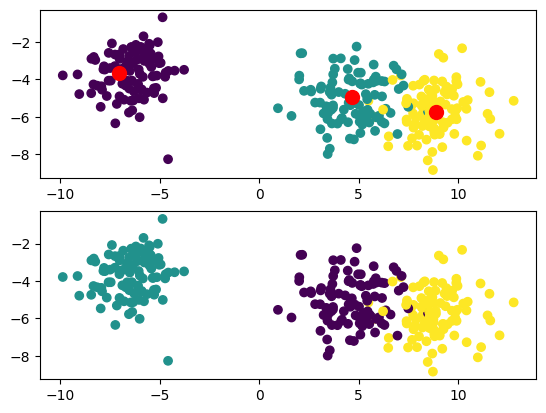

In [1111]:
fig, axs = plt.subplots(2)
show(df1, df1_y, ap, axs)

### Датасет 2

In [1154]:
ap = AffinityPropagation(preference = -70).fit(df2)

c:\users\ziabr\onedrive\рабочий стол\ml\myvenv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [1155]:
print(f'silhouette_score {silhouette_score(df2, ap.labels_)}')
print(f'davies_bouldin_score {davies_bouldin_score(df2, ap.labels_)}')

silhouette_score 0.5167656108107936
davies_bouldin_score 0.6826287087738041


In [1156]:
print(f'rand_score : {rand_score(df2_y, ap.labels_)}')
print(f'jaccard_score : {jaccard_score(df2_y, ap.labels_, average="micro")}')

rand_score : 0.712463768115942
jaccard_score : 0.7045454545454546


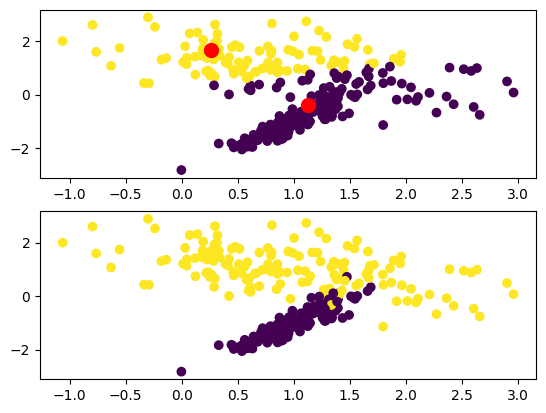

In [1157]:
fig, axs = plt.subplots(2)
show(df2, df2_y, ap, axs)

### Датасет 3

In [1166]:
ap = AffinityPropagation(preference = -300).fit(df3)

In [1167]:
print(f'silhouette_score {silhouette_score(df3, ap.labels_)}')
print(f'davies_bouldin_score {davies_bouldin_score(df3, ap.labels_)}')

silhouette_score 0.6335143151306524
davies_bouldin_score 0.5434371772834006


In [1168]:
print(f'rand_score : {rand_score(df3_y, ap.labels_)}')
print(f'jaccard_score : {jaccard_score(df3_y, ap.labels_, average="micro")}')

rand_score : 1.0
jaccard_score : 0.0


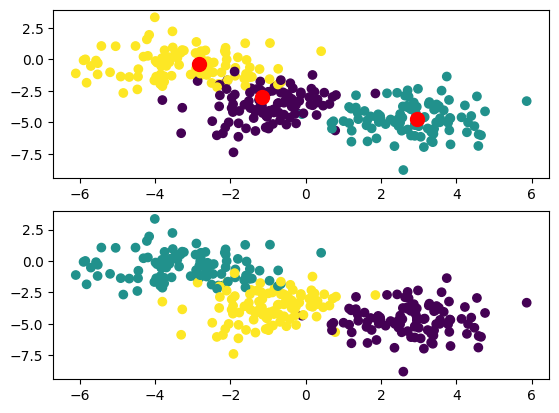

In [1169]:
fig, axs = plt.subplots(2)
show(df3, df3_y, ap, axs)

In [748]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import make_scorer

## DB-SCAN

### Датасет 1

In [795]:
df1

array([[  5.70055765,  -5.95566385,  -5.41618111,   7.06716226,
          3.33195904],
       [  3.47315583,  -5.78260486,  -8.63431198,   7.01707228,
          5.35879151],
       [ -8.23813624,  -2.96328329,  -3.93978682, -10.3950464 ,
         -7.21552198],
       ...,
       [  4.76835087,  -7.20184382,  -8.00042115,   6.03269717,
          6.2586028 ],
       [ -7.40252987,  -2.07910813,  -1.56587423,  -8.30071477,
         -7.96397161],
       [  9.81855946,  -6.90799971,  -9.31507564,  -2.55673125,
          6.26894994]])

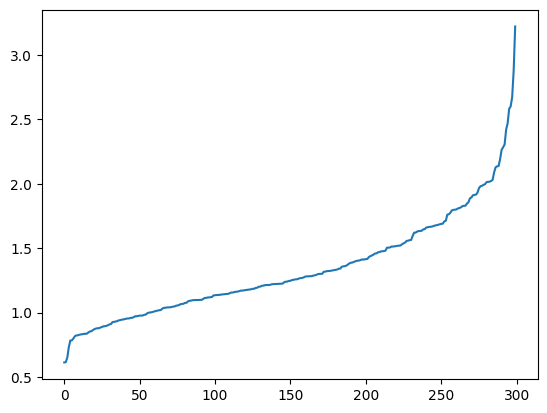

In [796]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5).fit(df1)
distances, indices = nbrs.kneighbors(df1)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

In [809]:
#params = {'eps': np.arange(0.1, 2, 0.1), 'min_samples': np.arange(3, 10, 3)}

#dbscan = GridSearchCV(estimator = DBSCAN(), param_grid = params, scoring = make_scorer(davies_bouldin_score)).fit(df1)
#dbscan.best_params
dbscan = DBSCAN(eps = 2, min_samples = 5).fit(df1)
dbscan.labels_

array([ 0,  0,  1,  0,  0,  1,  1,  0,  2,  2,  2,  1,  0,  2,  2,  1,  2,
       -1, -1,  1, -1,  2,  1,  1,  2,  0,  1,  0,  1,  1,  0, -1,  0,  2,
        1, -1,  1,  1,  2,  0,  0,  1, -1,  2,  1,  2,  2,  2,  2,  2,  0,
        0,  2,  1,  2,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0, -1,  1,
        0,  2,  1,  0, -1, -1,  0,  1,  1,  0,  2, -1,  0, -1,  2,  1,  2,
        0,  0,  0,  2,  0,  0,  2,  0, -1,  0,  1,  1,  1,  0,  0, -1,  2,
        1, -1, -1,  2,  2,  1,  2,  1,  2,  1,  1,  2,  1,  1,  2,  2,  1,
        1,  2,  1,  2, -1, -1,  2, -1,  1,  1, -1,  1,  2, -1,  2,  0,  2,
        1,  1,  2, -1,  1,  0,  2,  0,  1,  0,  0, -1,  0,  0,  2,  0,  1,
       -1, -1, -1,  1,  0,  2,  1, -1,  1,  0,  1,  2,  0, -1, -1,  0,  0,
       -1,  1,  2,  2,  0, -1,  1,  2,  2,  0,  0,  1,  0,  0,  0,  2,  2,
        2,  0,  1,  1,  1,  1,  1,  2,  1,  0,  0,  0,  1,  2,  1,  0, -1,
        2, -1,  2,  2,  0, -1,  1,  0, -1,  0,  2,  0,  0,  0,  0, -1,  0,
        2,  2,  1,  1,  2

In [810]:
print(f'silhouette_score {silhouette_score(df1, dbscan.labels_)}')
print(f'davies_bouldin_score {davies_bouldin_score(df1, dbscan.labels_)}')
print(f'rand_score : {rand_score(df1_y, dbscan.labels_)}')
print(f'jaccard_score : {jaccard_score(df1_y, dbscan.labels_, average="micro")}')

silhouette_score 0.5135989375219006
davies_bouldin_score 1.650912309484902
rand_score : 0.898840579710145
jaccard_score : 0.729106628242075


### Датасет 2

In [799]:
df2

array([[ 7.33245541e-01, -1.43100684e+00],
       [ 6.56042914e-01,  8.42840539e-01],
       [ 5.37983123e-01, -2.05654971e+00],
       [ 1.28930785e+00, -7.90228359e-02],
       [ 7.20124125e-01,  9.77236854e-01],
       [ 5.61991851e-01, -1.63579119e+00],
       [ 2.27397878e+00, -6.75681514e-01],
       [ 1.56522694e+00,  2.08303420e+00],
       [ 1.21316626e+00,  1.62063670e+00],
       [ 1.28650510e+00, -4.69634644e-01],
       [ 1.28417180e+00, -9.22700896e-01],
       [ 8.22079523e-01, -1.59515966e+00],
       [ 2.72539489e-01,  1.51006394e+00],
       [ 2.42717743e+00, -3.64402467e-01],
       [ 2.63173891e-01,  8.09743991e-01],
       [ 1.39445338e+00, -4.42585367e-01],
       [ 1.32068778e+00,  2.90052459e-01],
       [ 9.05809576e-01, -1.41622254e+00],
       [ 5.68113684e-01, -1.65580986e+00],
       [ 1.19954708e+00, -3.98932506e-01],
       [ 6.93330338e-01,  1.63002545e+00],
       [ 7.28891503e-01, -1.55042626e+00],
       [ 6.32579249e-01, -1.65797012e+00],
       [ 2.

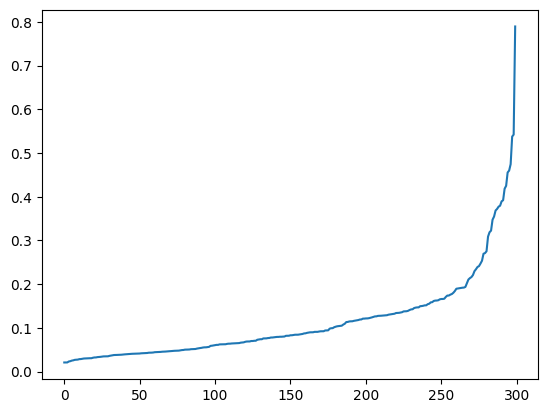

In [800]:
nbrs = NearestNeighbors(n_neighbors=5).fit(df2)
distances, indices = nbrs.kneighbors(df2)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

In [811]:
dbscan = DBSCAN(eps = 0.2, min_samples = 5).fit(df2)
dbscan.labels_

array([ 0,  1,  0,  0,  1,  0, -1, -1, -1,  0,  0,  0,  1, -1,  2,  0,  0,
        0,  0,  0,  6,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  2,
       -1,  6,  3,  1,  0,  0, -1,  0,  0,  0,  1,  0, -1,  1,  4,  1,  1,
        0,  3,  0,  1, -1,  0,  0,  0,  1,  0, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  6,  0,  0,  0,  0,  4, -1, -1,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  1,  0,  0, -1,  6,  0,  2,  0,  0,  0, -1, -1, -1,  0,
       -1,  3,  0,  1, -1, -1,  0, -1,  1,  0,  0, -1,  0,  0,  1, -1,  0,
        0,  0, -1, -1,  0,  0,  5, -1,  1,  1,  0, -1,  0,  5, -1,  0,  0,
       -1,  0,  1,  0, -1,  0,  0,  1,  1,  0,  1, -1, -1,  1,  1,  0,  1,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  4,  0,  0,  2,  0,
       -1,  1,  0,  0,  0, -1,  0,  1,  0,  1, -1,  1,  6,  0,  5,  0,  0,
        0, -1,  1,  0, -1,  1, -1, -1,  0,  1,  4, -1,  0,  1,  0,  1,  0,
       -1,  1,  0,  0,  6,  0,  0,  0,  0, -1,  0,  3, -1,  5,  0,  0,  0,
        0,  0, -1,  1,  0

In [812]:
print(f'silhouette_score {silhouette_score(df2, dbscan.labels_)}')
print(f'davies_bouldin_score {davies_bouldin_score(df2, dbscan.labels_)}')
print(f'rand_score : {rand_score(df2_y, dbscan.labels_)}')
print(f'jaccard_score : {jaccard_score(df2_y, dbscan.labels_, average="micro")}')

silhouette_score 0.13673033654939085
davies_bouldin_score 2.6547155741568282
rand_score : 0.7827870680044593
jaccard_score : 0.47058823529411764


### Датасет 3

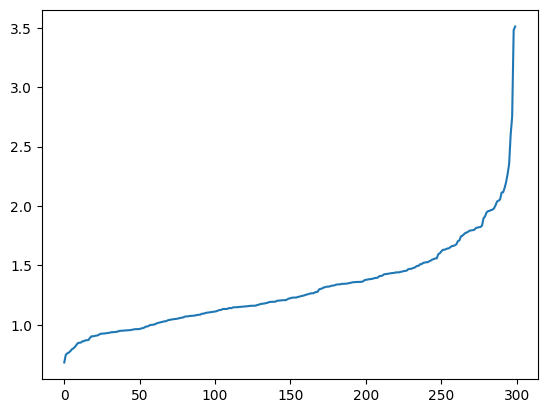

In [803]:
nbrs = NearestNeighbors(n_neighbors=5).fit(df3)
distances, indices = nbrs.kneighbors(df3)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

In [813]:
dbscan = DBSCAN(eps = 1.2, min_samples = 5).fit(df3)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  2, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1,  0, -1, -1,  0

In [814]:
print(f'silhouette_score {silhouette_score(df3, dbscan.labels_)}')
print(f'davies_bouldin_score {davies_bouldin_score(df3, dbscan.labels_)}')
print(f'rand_score : {rand_score(df3_y, dbscan.labels_)}')
print(f'jaccard_score : {jaccard_score(df3_y, dbscan.labels_, average="micro")}')

silhouette_score -0.5761812983261053
davies_bouldin_score 1.3464887763325772
rand_score : 0.37130434782608696
jaccard_score : 0.010101010101010102


## Gaussian Mixtures

In [834]:
from sklearn.mixture import GaussianMixture

In [835]:
show = lambda df, gm: [
    plt.scatter(df[:,0], df[:,1], c=gm.predict(df)), 
    plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')
]

## Датасет 1

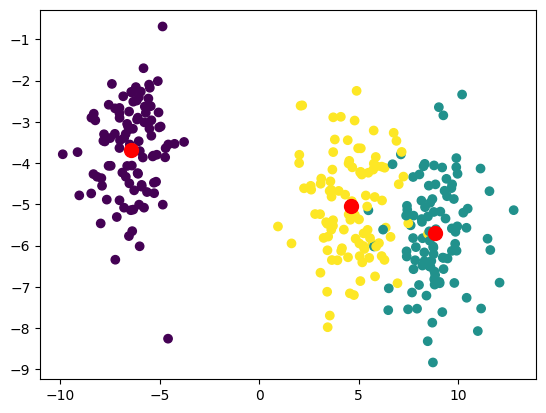

In [836]:
gm = GaussianMixture(n_components=3).fit(df1)
show(df1, gm)

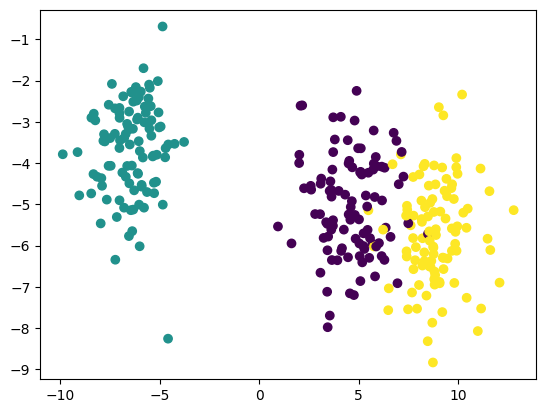

In [850]:
cls(df1, df1_y)

In [837]:
print(f'silhouette_score {silhouette_score(df1, gm.predict(df1))}')
print(f'davies_bouldin_score {davies_bouldin_score(df1, gm.predict(df1))}')
print(f'rand_score : {rand_score(df1_y, gm.predict(df1))}')
print(f'jaccard_score : {jaccard_score(df1_y, gm.predict(df1), average="micro")}')

silhouette_score 0.713330087311131
davies_bouldin_score 0.4247516027158372
rand_score : 1.0
jaccard_score : 0.0


## Датасет 2

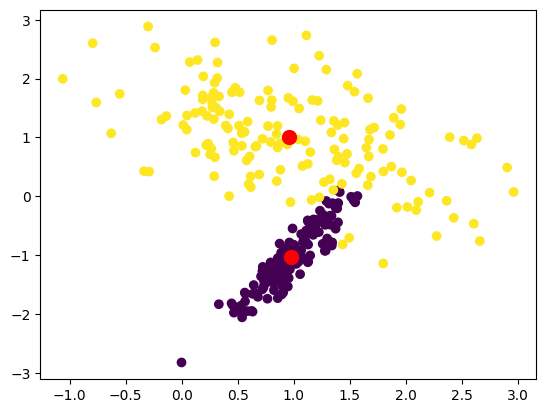

In [838]:
gm = GaussianMixture(n_components=2).fit(df2)
show(df2, gm)

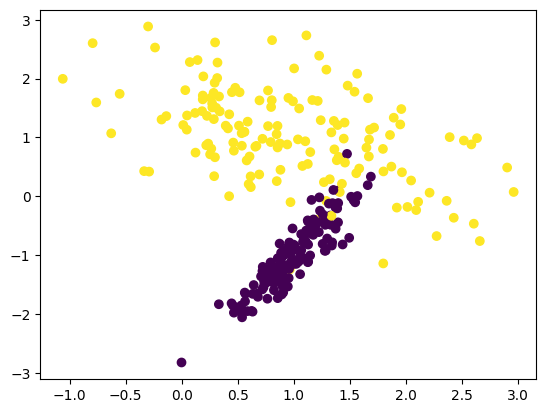

In [851]:
cls(df2, df2_y)

In [839]:
print(f'silhouette_score {silhouette_score(df2, gm.predict(df2))}')
print(f'davies_bouldin_score {davies_bouldin_score(df2, gm.predict(df2))}')
print(f'rand_score : {rand_score(df2_y, gm.predict(df2))}')
print(f'jaccard_score : {jaccard_score(df2_y, gm.predict(df2), average="micro")}')

silhouette_score 0.5035966415119724
davies_bouldin_score 0.7191987510530179
rand_score : 0.9168115942028986
jaccard_score : 0.9169329073482428


## Датасет 3

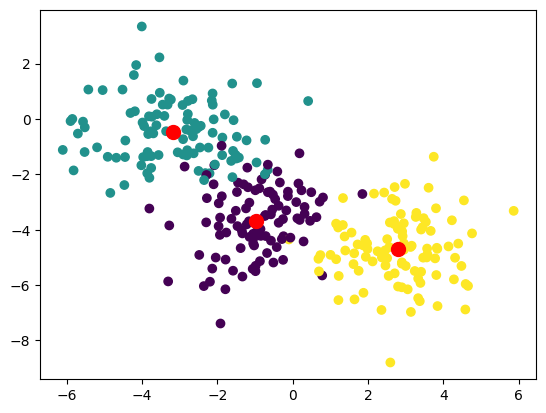

In [853]:
gm = GaussianMixture(n_components=3).fit(df3)
show(df3, gm)

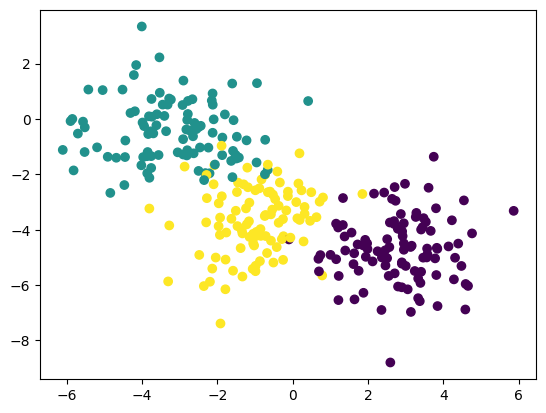

In [852]:
cls(df3, df3_y)

In [841]:
print(f'silhouette_score {silhouette_score(df3, gm.predict(df3))}')
print(f'davies_bouldin_score {davies_bouldin_score(df3, gm.predict(df3))}')
print(f'rand_score : {rand_score(df3_y, gm.predict(df3))}')
print(f'jaccard_score : {jaccard_score(df3_y, gm.predict(df3), average="micro")}')

silhouette_score 0.45108951750110926
davies_bouldin_score 1.2111688839070651
rand_score : 0.9469565217391305
jaccard_score : 0.0


## Иерархическая кластеризация

In [860]:
from sklearn.cluster import AgglomerativeClustering

### Датасет 1

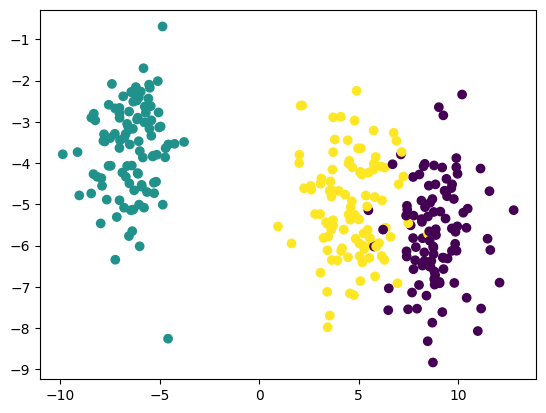

In [861]:
ac = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(df1)
plt.scatter(df1[:,0], df1[:,1], c=ac.labels_)

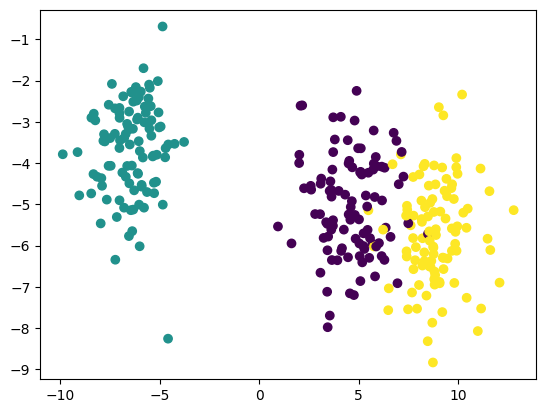

In [862]:
cls(df1, df1_y)

In [863]:
print(f'silhouette_score {silhouette_score(df3, gm.predict(df3))}')
print(f'davies_bouldin_score {davies_bouldin_score(df3, gm.predict(df3))}')
print(f'rand_score : {rand_score(df3_y, gm.predict(df3))}')
print(f'jaccard_score : {jaccard_score(df3_y, gm.predict(df3), average="micro")}')

silhouette_score 0.6335143151306524
davies_bouldin_score 0.5434371772834006
rand_score : 1.0
jaccard_score : 0.2


### Датасет 2

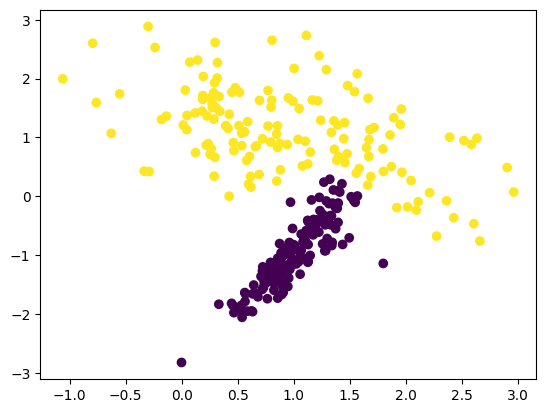

In [864]:
ac = AgglomerativeClustering(n_clusters=2, linkage="average").fit(df2)
plt.scatter(df2[:,0], df2[:,1], c=ac.labels_)

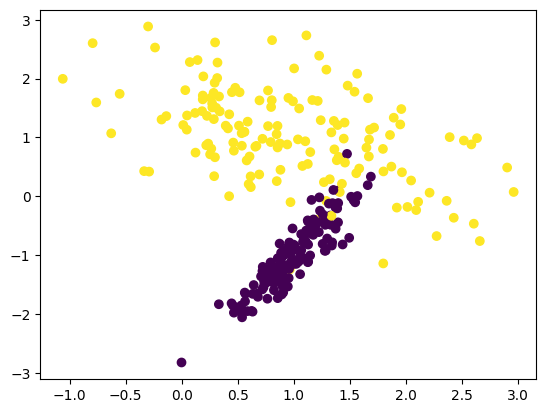

In [865]:
cls(df2, df2_y)

In [866]:
print(f'silhouette_score {silhouette_score(df3, gm.predict(df3))}')
print(f'davies_bouldin_score {davies_bouldin_score(df3, gm.predict(df3))}')
print(f'rand_score : {rand_score(df3_y, gm.predict(df3))}')
print(f'jaccard_score : {jaccard_score(df3_y, gm.predict(df3), average="micro")}')

silhouette_score 0.6335143151306524
davies_bouldin_score 0.5434371772834006
rand_score : 1.0
jaccard_score : 0.2


### Датасет 3

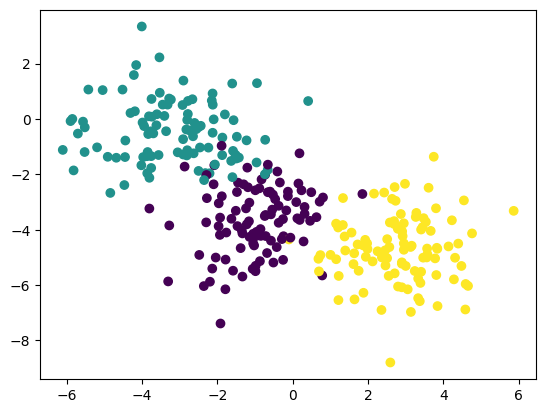

In [867]:
ac = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(df3)
plt.scatter(df3[:,0], df3[:,1], c=ac.labels_)

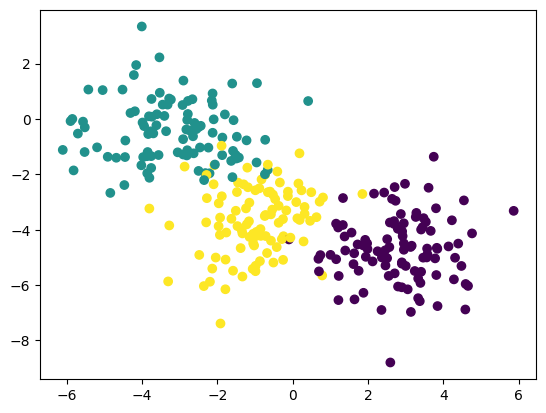

In [868]:
cls(df3, df3_y)

# Применение кластеризации к датасету из ЛР4

In [965]:
df = pd.read_csv('../data/rainAUS_prepared.csv')

In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              142193 non-null  int64  
 1   MinTemp           142193 non-null  float64
 2   MaxTemp           142193 non-null  float64
 3   Rainfall          142193 non-null  float64
 4   Evaporation       142193 non-null  float64
 5   WindGustSpeed     142193 non-null  float64
 6   WindSpeed9am      142193 non-null  float64
 7   WindSpeed3pm      142193 non-null  float64
 8   Humidity9am       142193 non-null  float64
 9   Humidity3pm       142193 non-null  float64
 10  Pressure9am       142193 non-null  float64
 11  Pressure3pm       142193 non-null  float64
 12  Cloud9am          142193 non-null  float64
 13  Cloud3pm          142193 non-null  float64
 14  Temp9am           142193 non-null  float64
 15  Temp3pm           142193 non-null  float64
 16  ord__Location     14

In [1014]:
df

Date  MinTemp  MaxTemp  Rainfall  Evaporation  WindGustSpeed  \
0         12     13.4     22.9       0.6          4.0           44.0   
1         12      7.4     25.1       0.0          4.0           44.0   
2         12     12.9     25.7       0.0          4.0           46.0   
3         12      9.2     28.0       0.0          4.0           24.0   
4         12     17.5     32.3       1.0          4.0           41.0   
...      ...      ...      ...       ...          ...            ...   
142188     6      3.5     21.8       0.0          4.0           31.0   
142189     6      2.8     23.4       0.0          4.0           31.0   
142190     6      3.6     25.3       0.0          4.0           22.0   
142191     6      5.4     26.9       0.0          4.0           37.0   
142192     6      7.8     27.0       0.0          4.0           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud9am  \
0               20.0          24.0         71.0         22.0  ...       8.0   
1                4.0          22.0         44.0         25.0  ...       7.0   
2               19.0          26.0         38.0         30.0  ...       7.0   
3               11.0           9.0         45.0         16.0  ...       7.0   
4                7.0          20.0         82.0         33.0  ...       7.0   
...              ...           ...          ...          ...  ...       ...   
142188          15.0          13.0         59.0         27.0  ...       7.0   
142189          13.0          11.0         51.0         24.0  ...       7.0   
142190          13.0           9.0         56.0         21.0  ...       7.0   
142191           9.0           9.0         53.0         24.0  ...       7.0   
142192          13.0           7.0         51.0         24.0  ...       3.0   

        Cloud3pm  Temp9am  Temp3pm  ord__Location  ord__WindDir9am  \
0            7.0     16.9     21.8            2.0             13.0   
1            7.0     17.2     24.3            2.0              6.0   
2            2.0     21.0     23.2            2.0             13.0   
3            7.0     18.1     26.5            2.0              9.0   
4            8.0     17.8     29.7            2.0              1.0   
...          ...      ...      ...            ...              ...   
142188       7.0      9.4     20.9           41.0              2.0   
142189       7.0     10.1     22.4           41.0              9.0   
142190       7.0     10.9     24.5           41.0              9.0   
142191       7.0     12.5     26.1           41.0              9.0   
142192       2.0     15.1     26.0           41.0             10.0   

        ord__WindGustDir  ord__WindDir3pm  ord__RainToday  RainTomorrow  
0                   13.0             14.0             0.0             0  
1                   14.0             15.0             0.0             0  
2                   15.0             15.0             0.0             0  
3                    4.0              0.0             0.0             0  
4                   13.0              7.0             0.0             0  
...                  ...              ...             ...           ...  
142188               0.0              0.0             0.0             0  
142189               0.0              1.0             0.0             0  
142190               6.0              3.0             0.0             0  
142191               3.0             14.0             0.0             0  
142192               9.0              3.0             0.0             0  

[142193 rows x 22 columns]

In [1015]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler

In [1021]:
nm = NearMiss()

In [1022]:
y = df["RainTomorrow"][1:140000:100].to_numpy()
X = df.drop(["RainTomorrow"], axis=1)[1:140000:100].to_numpy()
X

array([[12. ,  7.4, 25.1, ..., 14. , 15. ,  0. ],
       [ 3. , 17.1, 25.8, ...,  1. ,  8. ,  1. ],
       [ 6. ,  7. , 17. , ...,  1. ,  1. ,  1. ],
       ...,
       [10. , 23.9, 37.6, ...,  0. ,  2. ,  1. ],
       [ 1. , 23. , 36.3, ..., 11. , 14. ,  1. ],
       [ 5. , 10.7, 34. , ...,  8. ,  2. ,  0. ]])

In [1023]:
X, y = nm.fit_resample(X, y.ravel())

In [1024]:
scaler = StandardScaler()

In [1025]:
X = scaler.fit_transform(X)

In [1026]:
X

array([[ 1.19952305, -0.36100319, -0.71648086, ...,  0.08842263,
         0.44222669,  1.31136008],
       [-0.38973497, -0.89076658,  0.2578132 , ...,  0.08842263,
         0.21835804, -0.76256706],
       [ 0.88167145, -1.42052998,  0.29140954, ..., -0.57220618,
         1.11383265, -0.76256706],
       ...,
       [-1.66114138,  2.25470357,  1.28250177, ...,  0.96926104,
         1.11383265, -0.76256706],
       [ 1.51737465,  2.0725974 ,  2.15600679, ...,  1.18947064,
         1.3377013 , -0.76256706],
       [-1.02543817,  1.95671166,  1.23210725, ..., -1.45304459,
        -0.67711657,  1.31136008]])

In [1027]:
cls = lambda df, df_y, i, j: plt.scatter(df[:, i], df[:, j], marker="o", c=df_y)

In [1028]:
args = [0, 1, 2, 4, 5, 6, 7, 8]

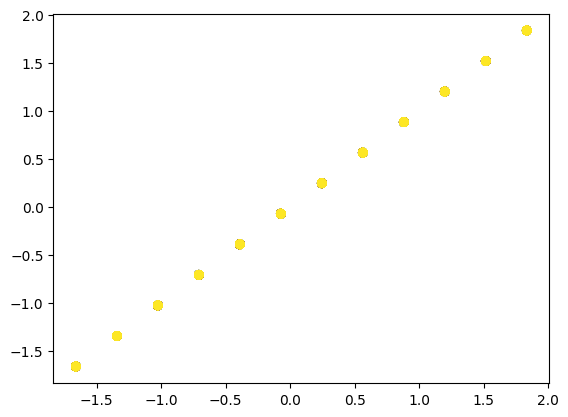

0 0


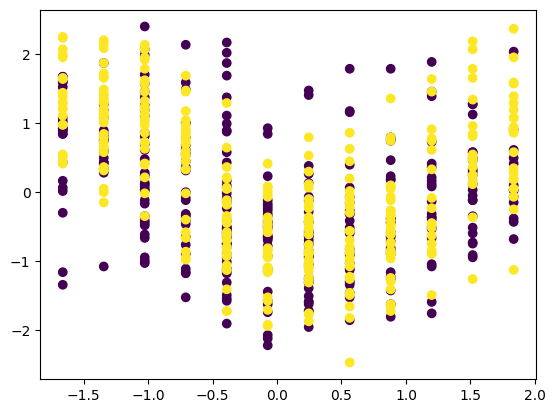

0 1


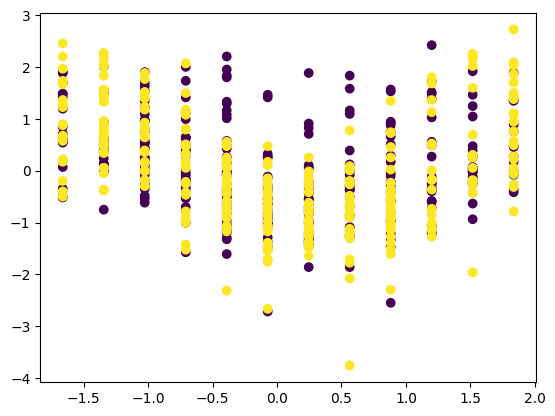

0 2


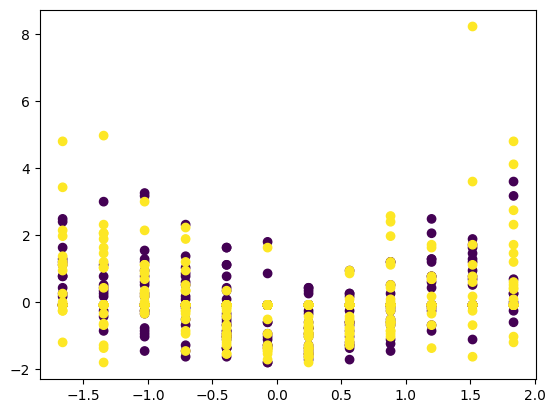

0 4


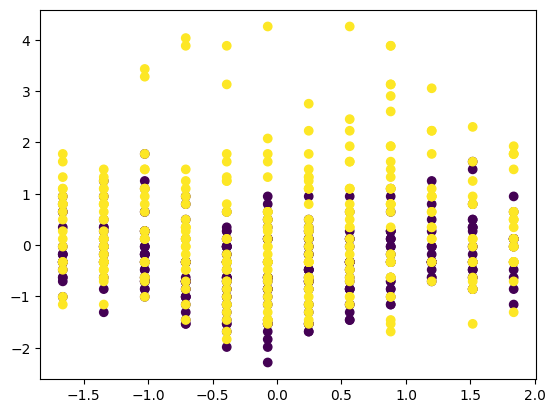

0 5


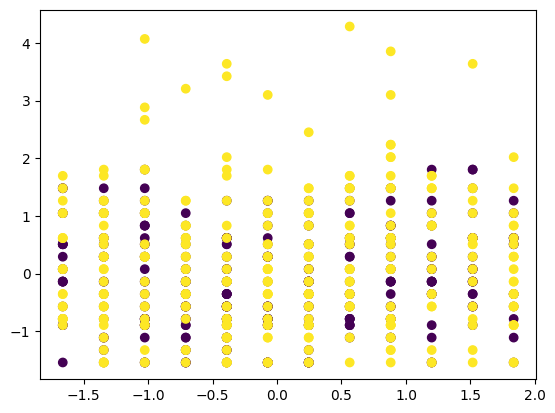

0 6


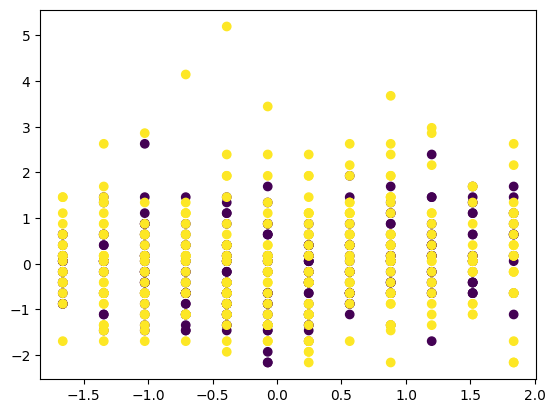

0 7


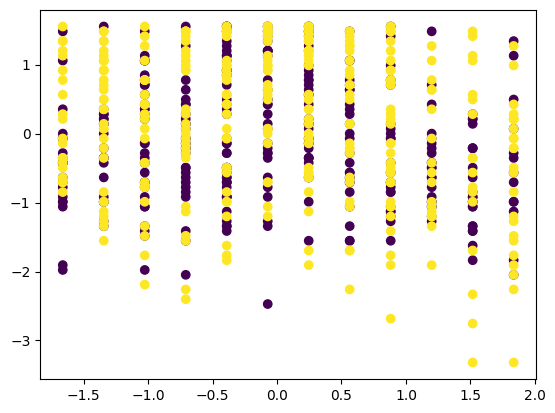

0 8


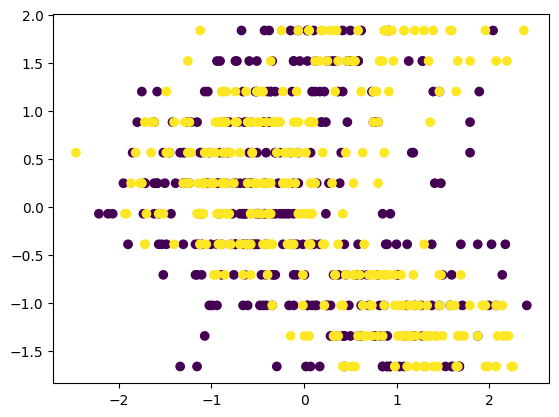

1 0


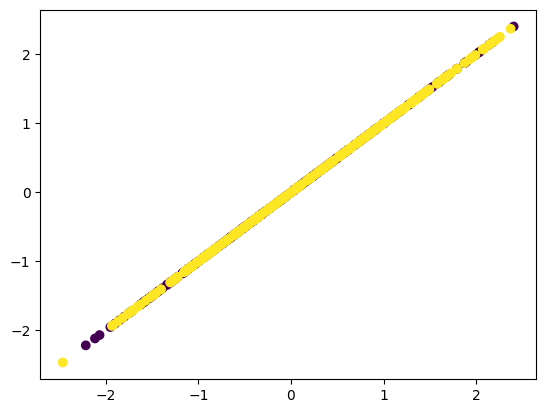

1 1


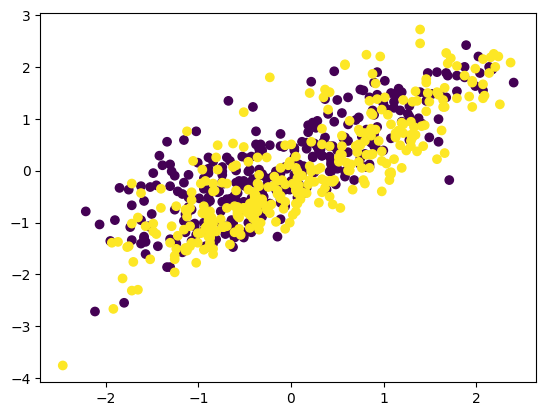

1 2


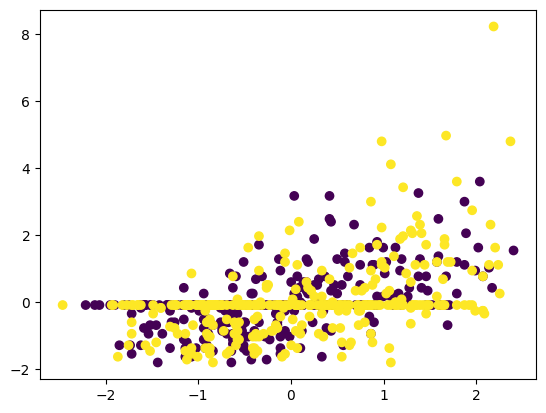

1 4


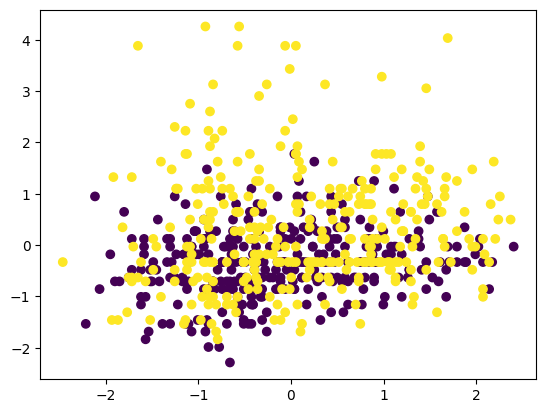

1 5


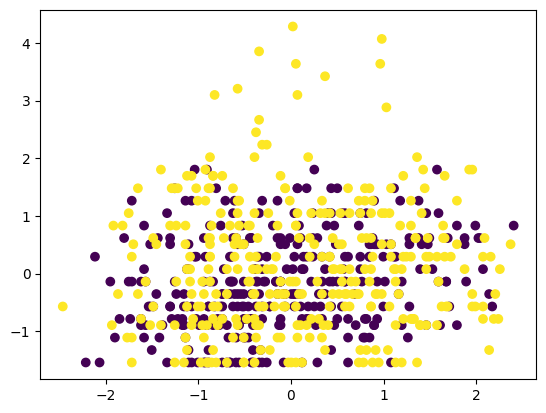

1 6


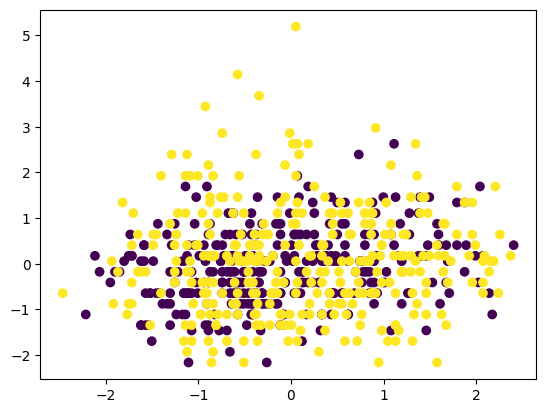

1 7


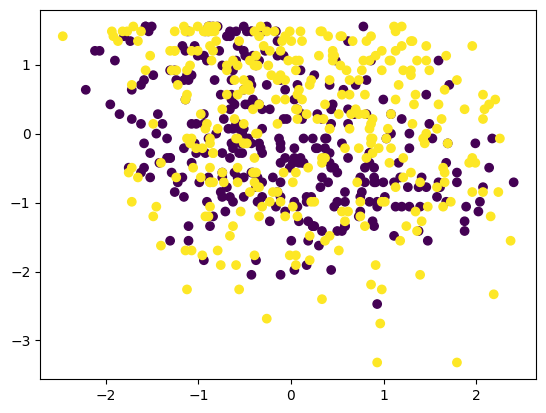

1 8


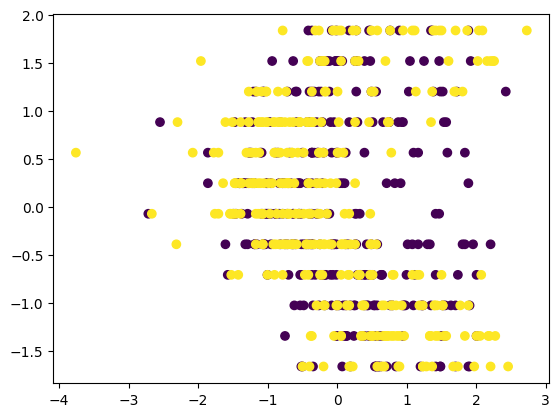

2 0


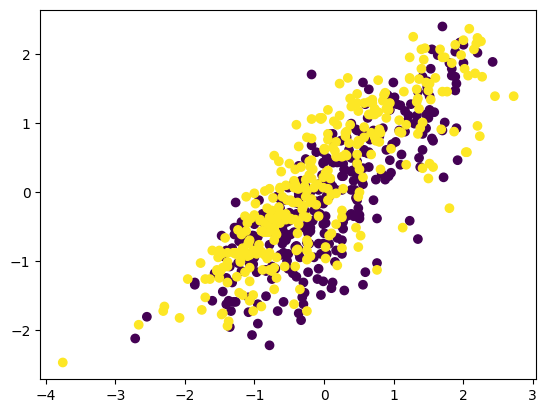

2 1


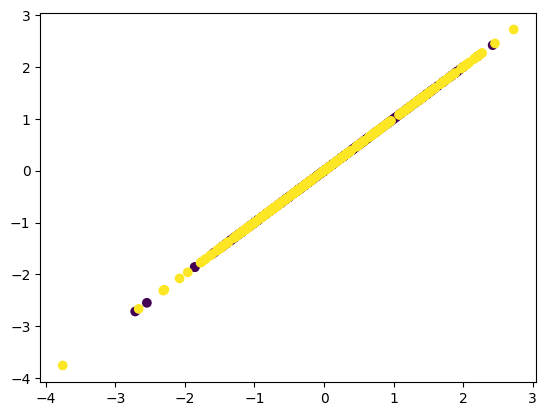

2 2


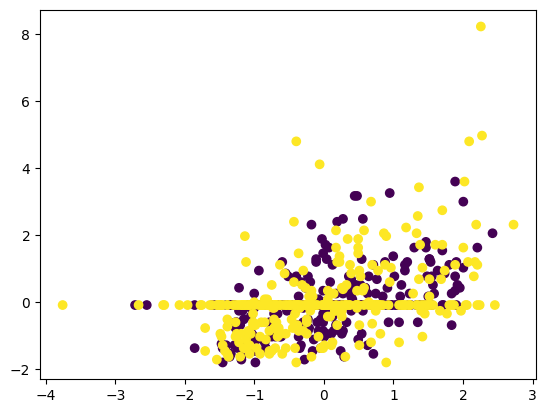

2 4


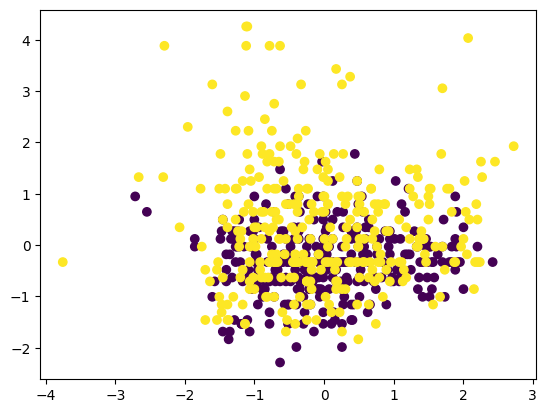

2 5


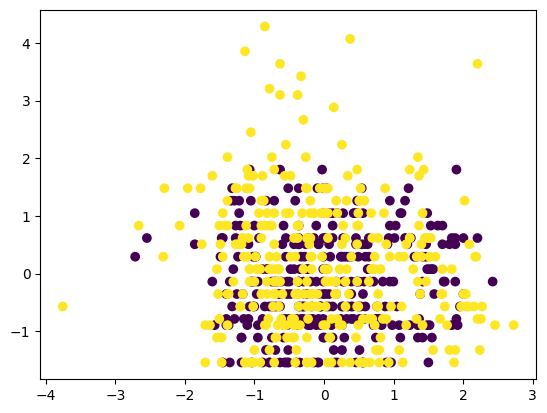

2 6


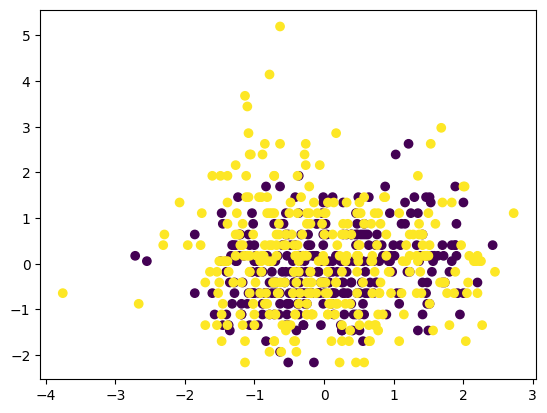

2 7


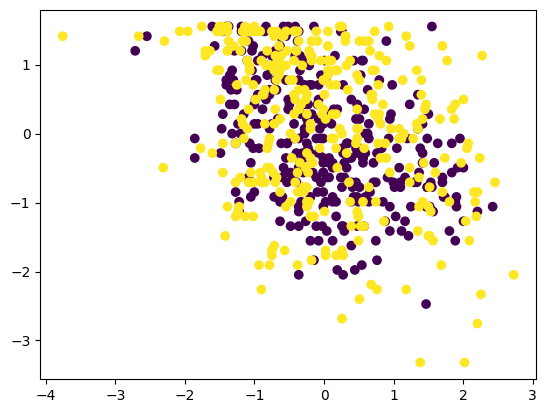

2 8


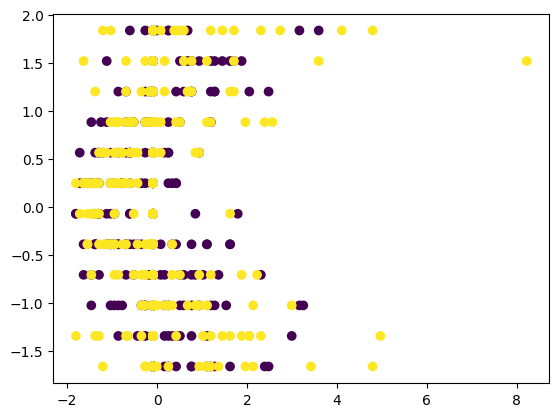

4 0


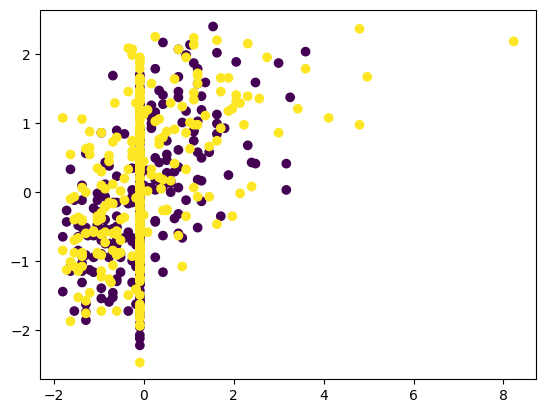

4 1


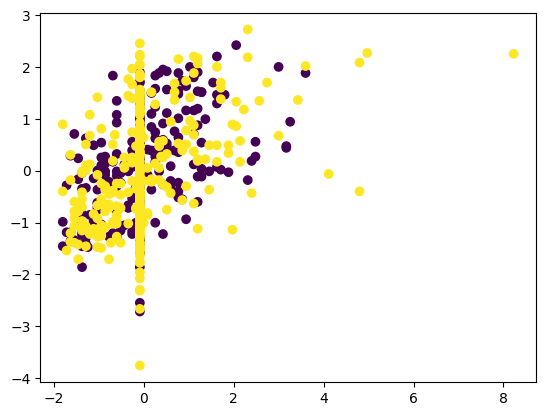

4 2


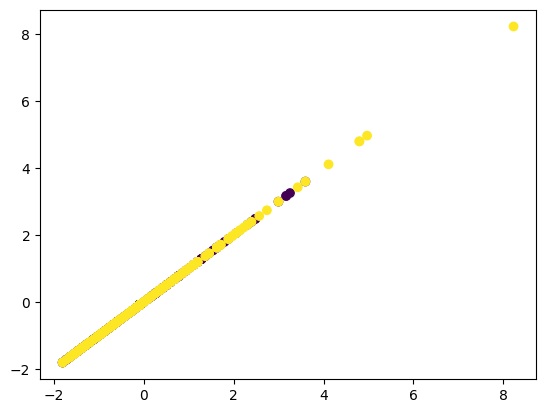

4 4


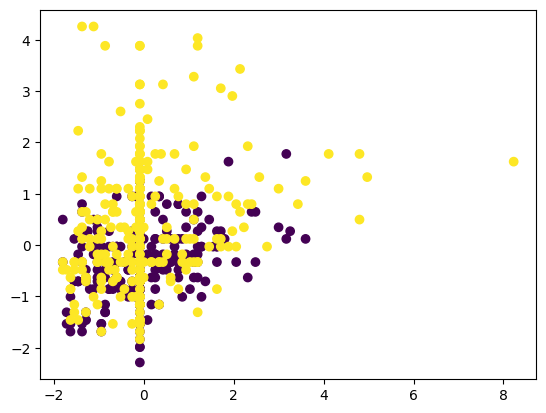

4 5


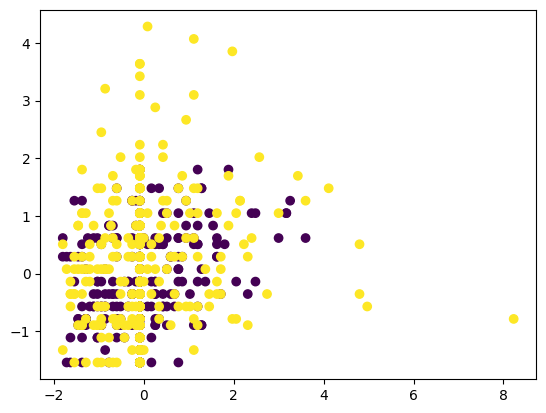

4 6


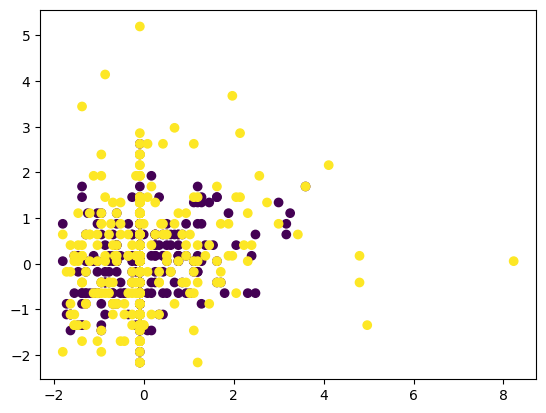

4 7


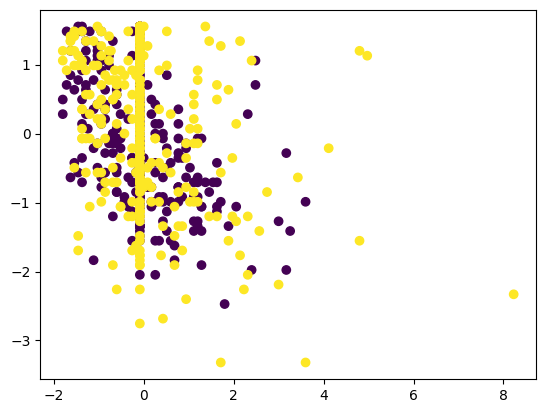

4 8


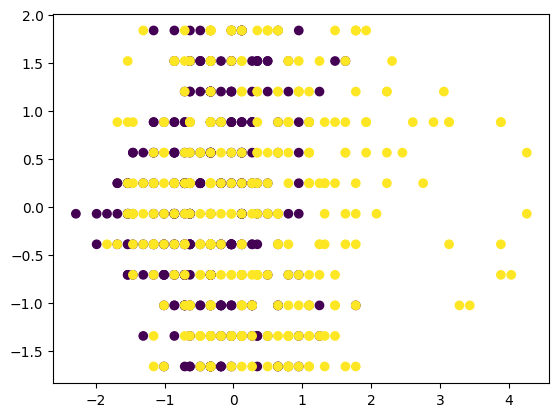

5 0


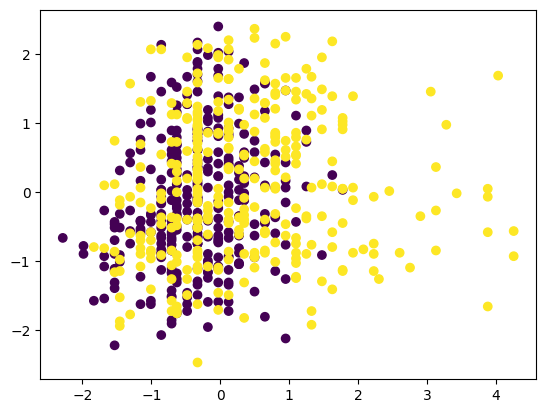

5 1


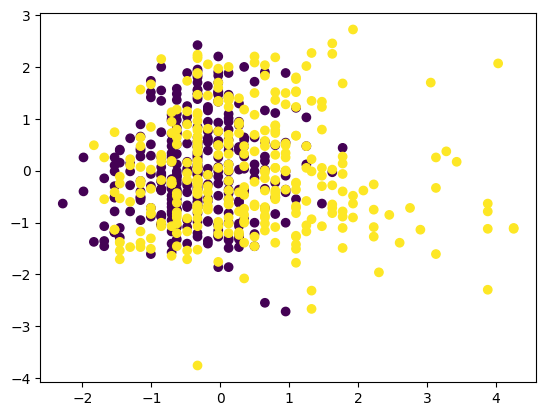

5 2


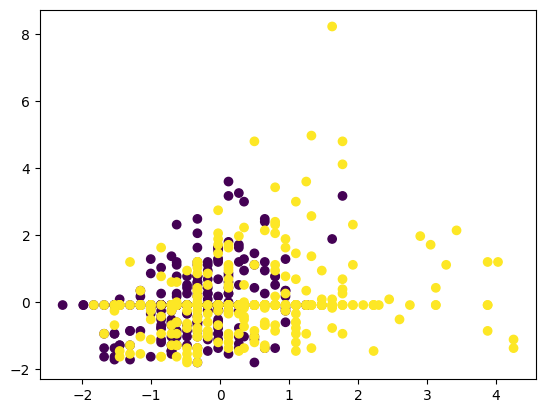

5 4


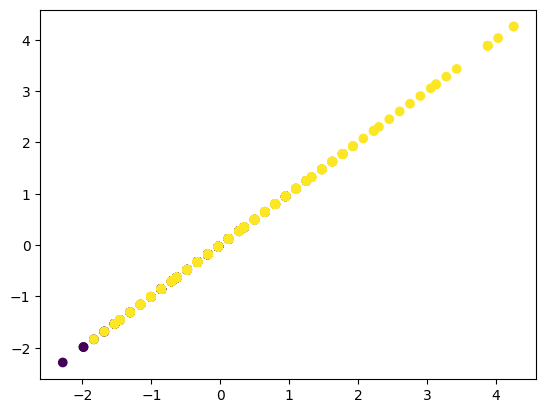

5 5


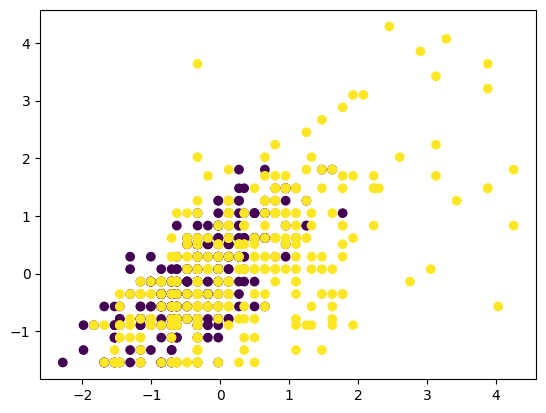

5 6


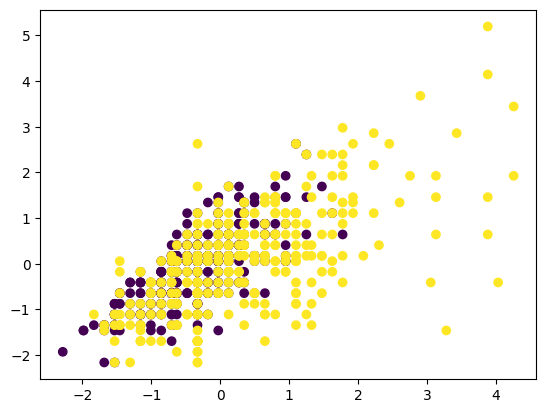

5 7


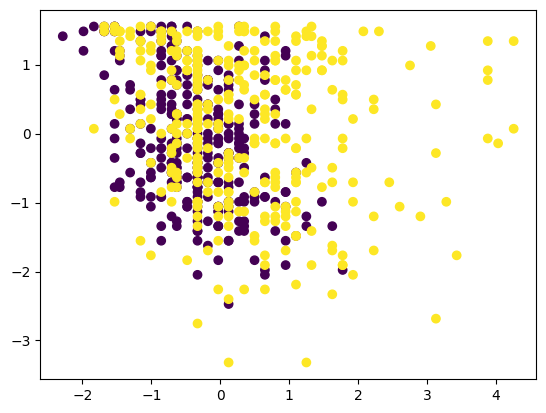

5 8


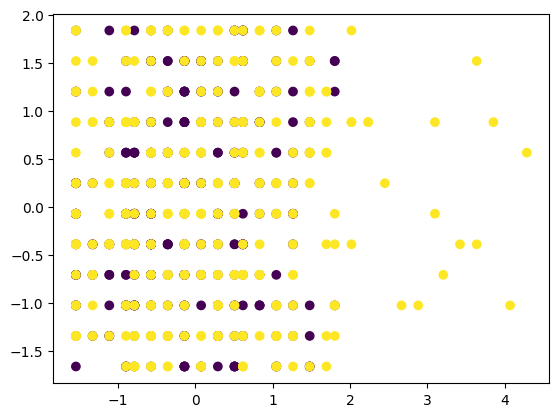

6 0


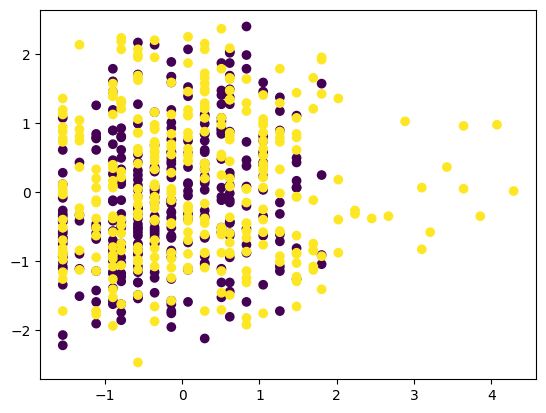

6 1


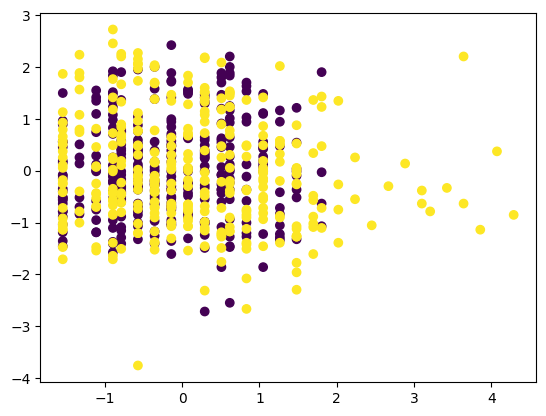

6 2


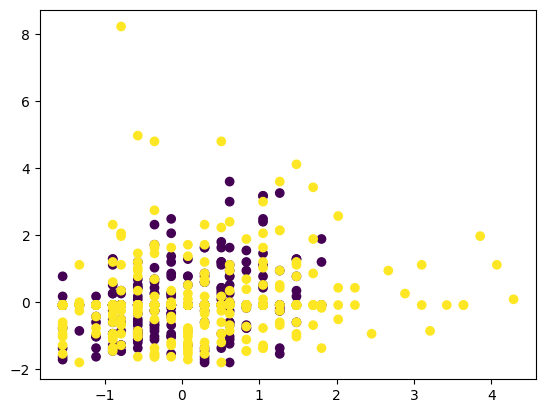

6 4


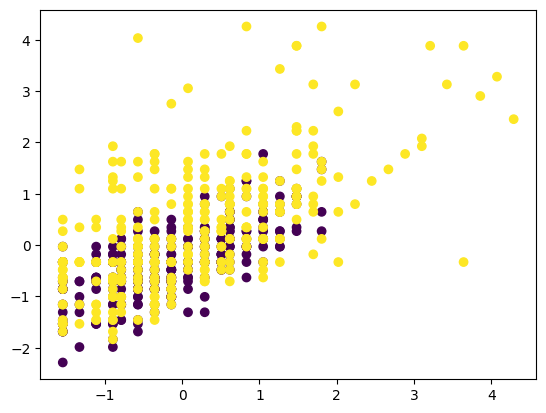

6 5


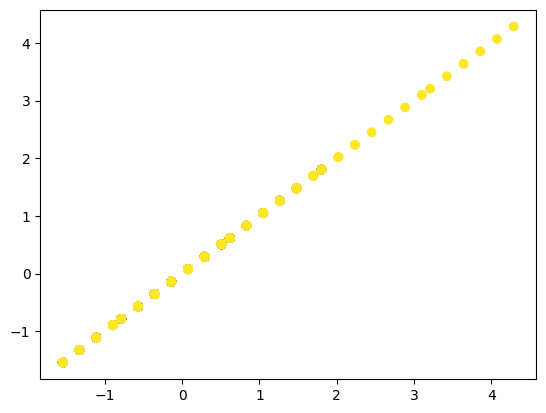

6 6


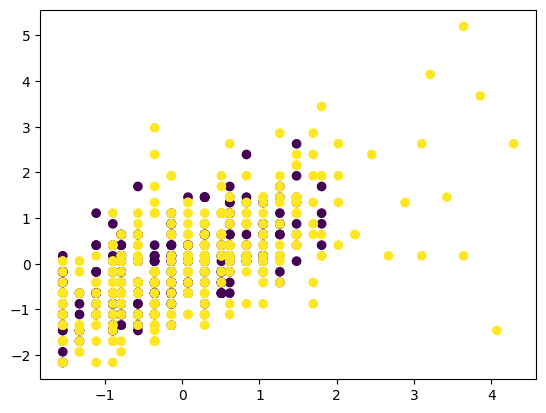

6 7


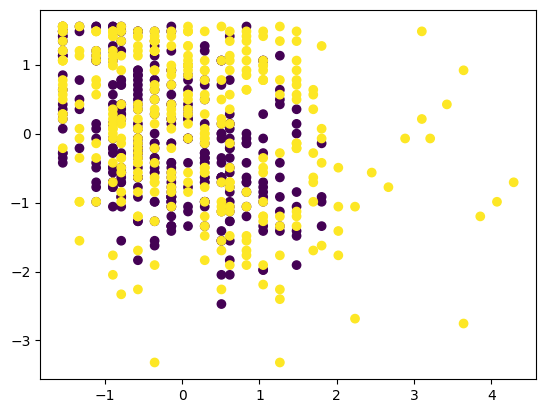

6 8


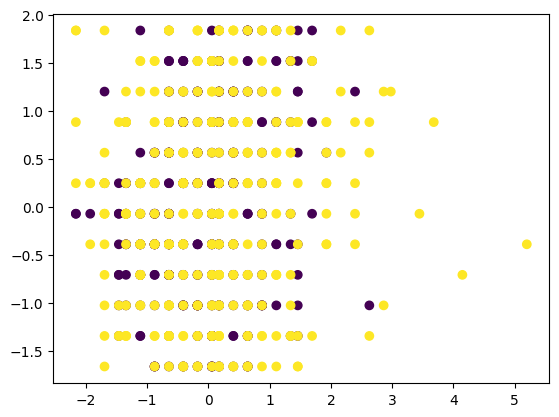

7 0


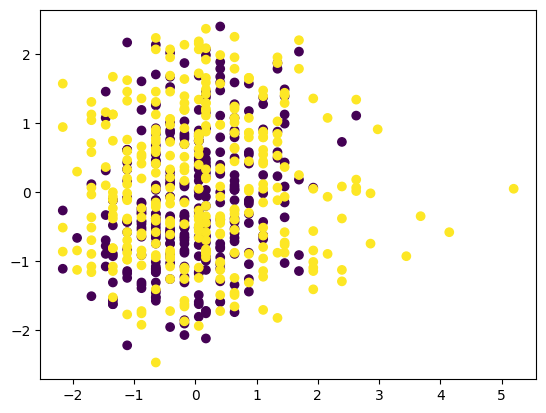

7 1


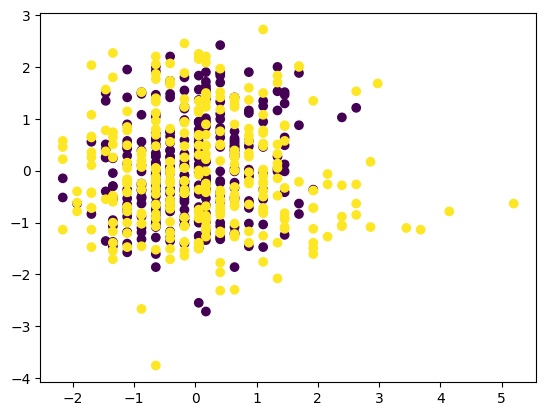

7 2


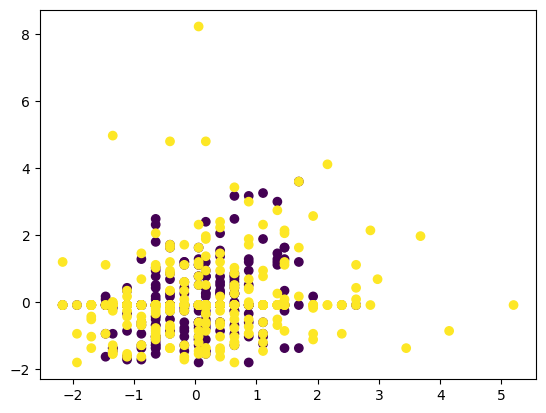

7 4


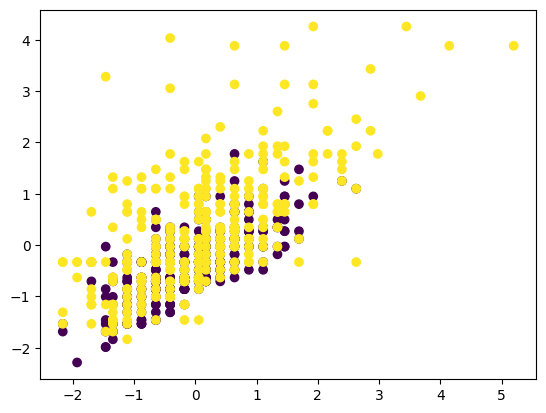

7 5


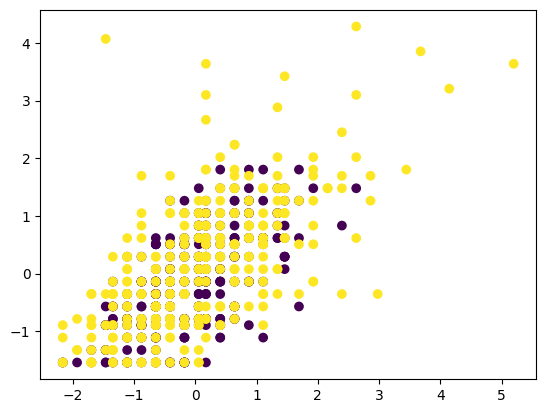

7 6


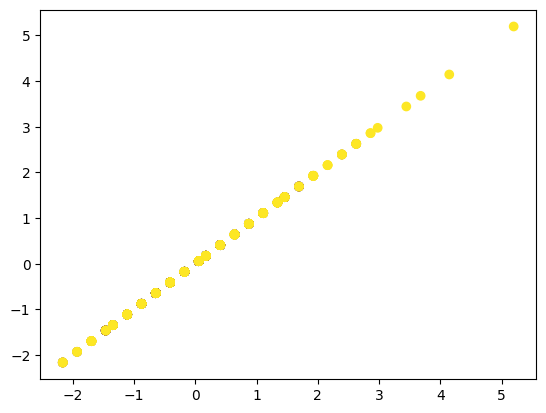

7 7


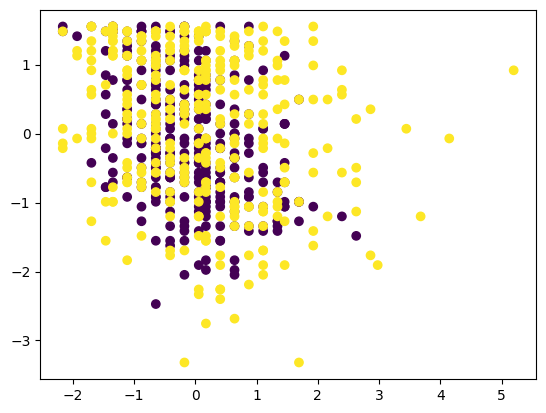

7 8


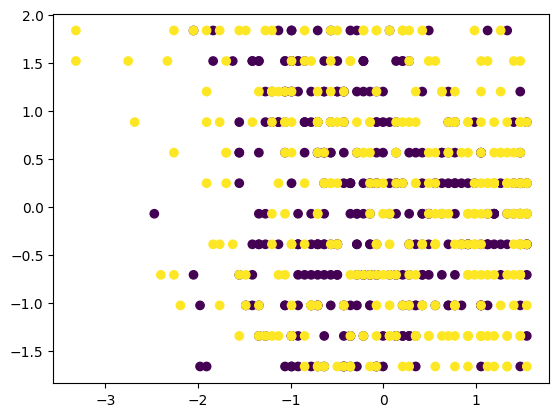

8 0


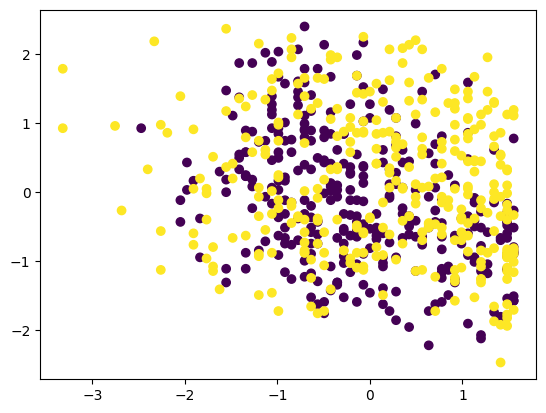

8 1


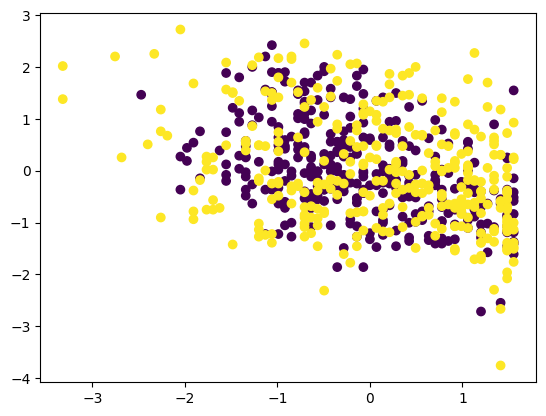

8 2


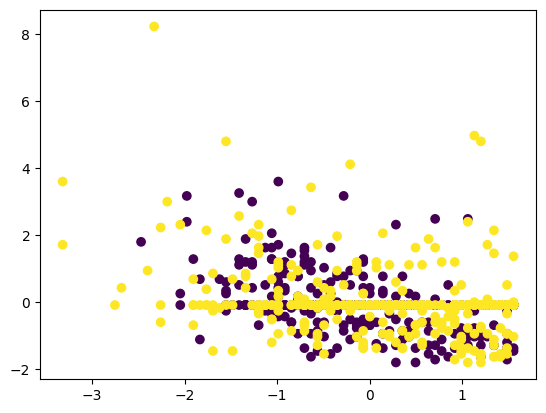

8 4


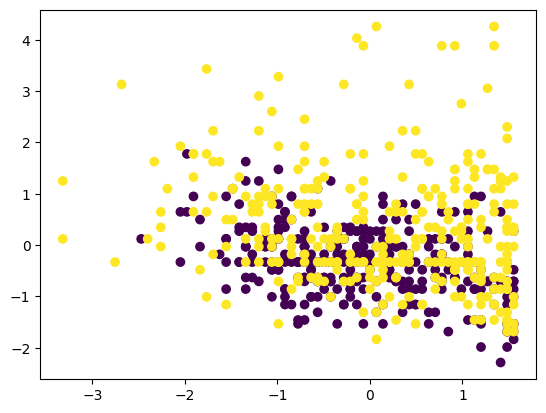

8 5


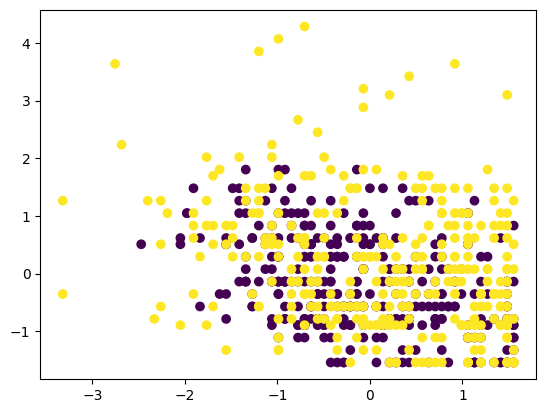

8 6


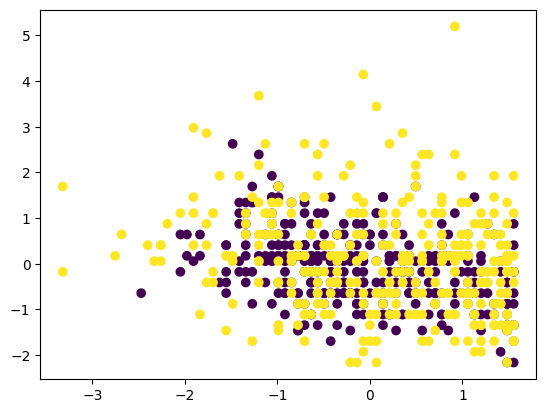

8 7


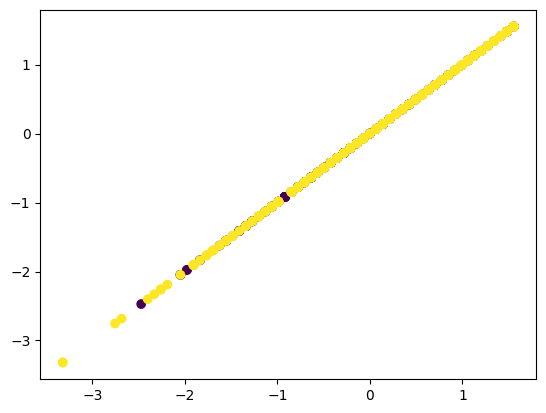

8 8


In [1029]:
for i in args:
    for j in args:
        cls(X, y, i, j)
        plt.show()
        print(i,j)

In [1030]:
def metrics(X, y, predict):
    print(f'silhouette_score {silhouette_score(X, predict)}')
    print(f'davies_bouldin_score {davies_bouldin_score(X, predict)}')
    print(f'rand_score : {rand_score(y, predict)}')
    print(f'jaccard_score : {jaccard_score(y, predict, average="micro")}')

## K-means

In [1034]:
kmeans = KMeans(n_clusters = 2, n_init='auto', max_iter = 20000).fit(X) 

metrics(X, y, kmeans.labels_)

silhouette_score 0.15548354499317987
davies_bouldin_score 2.2137075184867494
rand_score : 0.5024345146379045
jaccard_score : 0.2987012987012987


In [1047]:
show = lambda df, df_y, model, axs: [
    axs[0].scatter(df[:,1], df[:,2], c=model.labels_, marker="o"),
    axs[0].scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c='red'),
    axs[1].scatter(df[:, 1], df[:,2], marker="o", c=df_y)
]

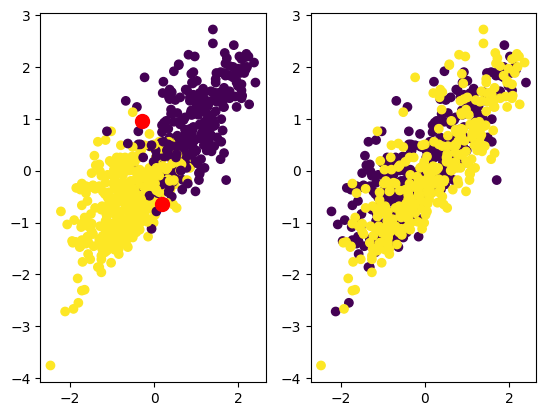

In [1048]:
fig, axs = plt.subplots(1,2)
show(X, y, kmeans, axs)

## Affinity propagation

In [1070]:
ap = AffinityPropagation(preference = -2500).fit(X)

In [1071]:
metrics(X, y, ap.labels_)

silhouette_score 0.13047317037279305
davies_bouldin_score 2.3921199659784538
rand_score : 0.501960412468887
jaccard_score : 0.3669821240799159


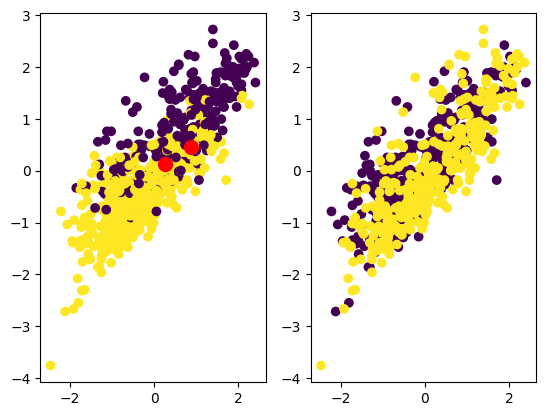

In [1072]:
fig, axs = plt.subplots(1,2)
show(X, y, ap.labels_, axs)

## DB-SCAN

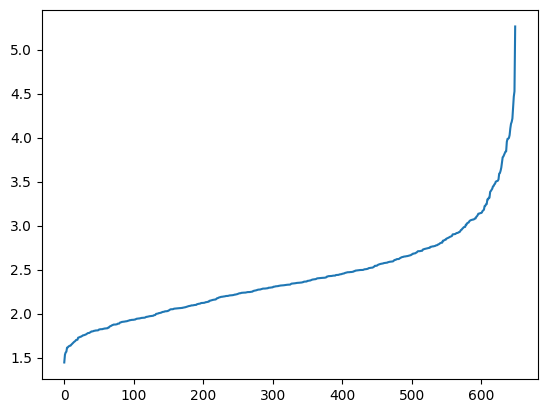

In [1073]:
nbrs = NearestNeighbors(n_neighbors=5).fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

In [1094]:
dbscan = DBSCAN(eps = 7, min_samples = 150).fit(X)
metrics(X, y, dbscan.labels_)

silhouette_score 0.44141209154651434
davies_bouldin_score 0.41924948274268925
rand_score : 0.49923432499703685
jaccard_score : 0.3333333333333333


In [1170]:
cls = lambda df, df_y: plt.scatter(df[:, 1], df[:, 2], marker="o", c=df_y)

## Gaussian Mixture

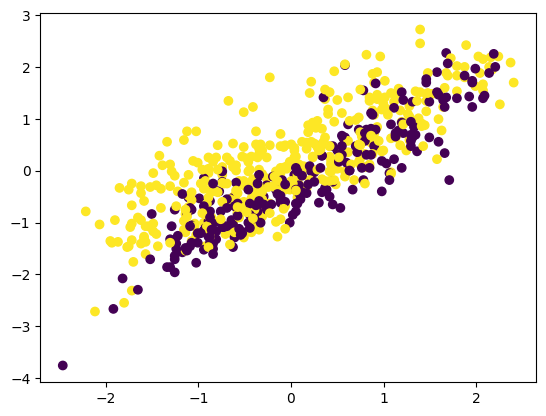

In [1171]:
gm = GaussianMixture(n_components=2).fit(X)

cls(X, gm.predict(X))

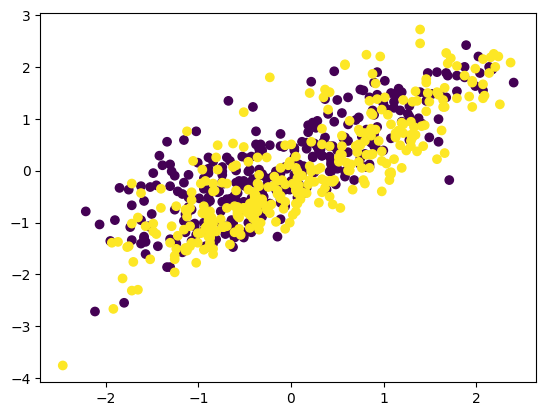

In [1100]:
cls(X, y)

In [1172]:
metrics(X, y, gm.predict(X))

silhouette_score 0.09454912455898049
davies_bouldin_score 3.1492601122792294
rand_score : 0.5420173047291691
jaccard_score : 0.21495327102803738


## Иерархическая кластеризация

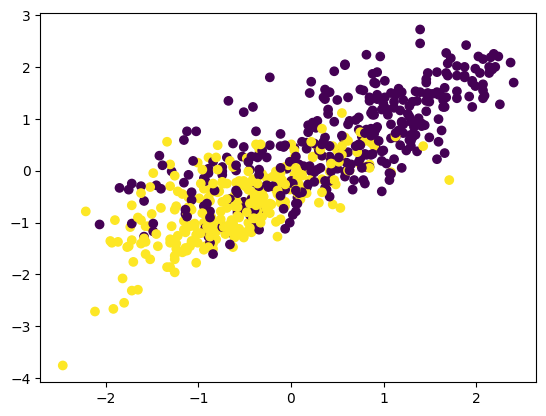

In [1173]:
ac = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(X)
cls(X, ac.labels_)

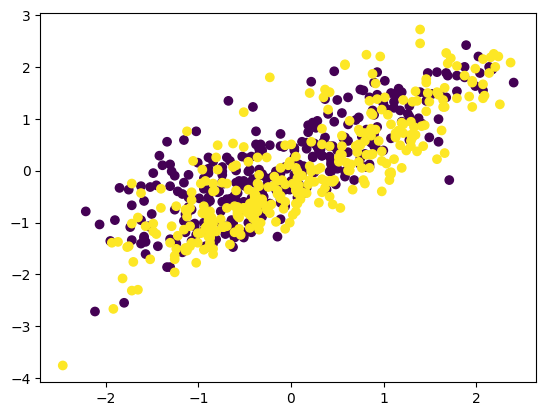

In [1174]:
cls(X, y)

In [1175]:
metrics(X, y, ac.labels_)

silhouette_score 0.10214047847528233
davies_bouldin_score 2.724713293325205
rand_score : 0.5017375844494488
jaccard_score : 0.3026052104208417


In [10]:
import pandas as pd

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [12]:
reg_stats = lambda y, y_pred: [
    print(f'mape : {mean_absolute_percentage_error(y, y_pred)}'), 
    print(f'mse: {mean_squared_error(y, y_pred)}')
]

In [13]:
df = pd.read_csv('../data/winequality.csv')
x = df.drop(['quality'], axis=1)
y = df['quality']

In [17]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.2, min_samples = 5).fit(x)

In [18]:
reg_stats(dbscan.labels_, y)

mape : 33272707728771.363
mse: 46.696321379098045


[None, None]

In [ ]:
import pickle
with open('../data/pca.picle', 'wb') as f:
    pickle.dump(pca, f)